In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Coustomer Segmentation.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df['Invoice_Date'] = pd.to_datetime(df['InvoiceDate']).dt.date

In [6]:
df['Invoice_Time'] = pd.to_datetime(df['InvoiceDate']).dt.time

In [7]:
df['year_of_date'] = df['InvoiceDate'].dt.year

In [8]:
df['month_of_date'] = df['InvoiceDate'].dt.month

In [9]:
df['day_of_date'] = df['InvoiceDate'].dt.day

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      541909 non-null  object        
 1   StockCode      541909 non-null  object        
 2   Description    540455 non-null  object        
 3   Quantity       541909 non-null  int64         
 4   InvoiceDate    541909 non-null  datetime64[ns]
 5   UnitPrice      541909 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        541909 non-null  object        
 8   Invoice_Date   541909 non-null  object        
 9   Invoice_Time   541909 non-null  object        
 10  year_of_date   541909 non-null  int64         
 11  month_of_date  541909 non-null  int64         
 12  day_of_date    541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 53.7+ MB


# checking null values

In [12]:
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description        1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
Invoice_Date          0
Invoice_Time          0
year_of_date          0
month_of_date         0
day_of_date           0
dtype: int64

In [13]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo         0.000000
StockCode         0.000000
Description       0.268311
Quantity          0.000000
InvoiceDate       0.000000
UnitPrice         0.000000
CustomerID       24.926694
Country           0.000000
Invoice_Date      0.000000
Invoice_Time      0.000000
year_of_date      0.000000
month_of_date     0.000000
day_of_date       0.000000
dtype: float64

In [14]:
df['Description'].dropna(inplace=True)

In [15]:
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description        1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
Invoice_Date          0
Invoice_Time          0
year_of_date          0
month_of_date         0
day_of_date           0
dtype: int64

In [16]:
df.shape

(541909, 13)

# Dropping the irrelevant columns

In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time',
       'year_of_date', 'month_of_date', 'day_of_date'],
      dtype='object')

In [18]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date
239767,558067,22905,CALENDAR IN SEASON DESIGN,6,2011-06-24 15:51:00,2.95,14156.0,EIRE,2011-06-24,15:51:00,2011,6,24
58819,541264,22090,PAPER BUNTING RETROSPOT,5,2011-01-16 16:10:00,2.95,17064.0,United Kingdom,2011-01-16,16:10:00,2011,1,16
189446,553152,23108,SET OF 10 LED DOLLY LIGHTS,6,2011-05-13 14:55:00,6.25,13089.0,United Kingdom,2011-05-13,14:55:00,2011,5,13
35547,539436,48173C,DOORMAT BLACK FLOCK,1,2010-12-17 14:49:00,14.43,NaN,United Kingdom,2010-12-17,14:49:00,2010,12,17
290859,562418,23245,SET OF 3 REGENCY CAKE TINS,4,2011-08-04 16:34:00,4.95,16572.0,United Kingdom,2011-08-04,16:34:00,2011,8,4


In [19]:
df.drop(['InvoiceNo','CustomerID','InvoiceDate'],axis=1,inplace=True)

In [20]:
df.sample(5)

,StockCode,Description,Quantity,UnitPrice,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date
288855,84580,MOUSE TOY WITH PINK T-SHIRT,4,3.75,United Kingdom,2011-08-03,13:10:00,2011,8,3
321868,23342,MINT DINER WALL CLOCK,1,8.50,United Kingdom,2011-09-01,16:46:00,2011,9,1
296380,21498,RED RETROSPOT WRAP,25,0.42,United Kingdom,2011-08-10,12:11:00,2011,8,10
242308,84596B,SMALL DOLLY MIX DESIGN ORANGE BOWL,8,0.42,United Kingdom,2011-06-28,12:16:00,2011,6,28
121889,22977,DOLLY GIRL CHILDRENS EGG CUP,12,1.25,United Kingdom,2011-03-17,10:38:00,2011,3,17


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   StockCode      541909 non-null  object 
 1   Description    540455 non-null  object 
 2   Quantity       541909 non-null  int64  
 3   UnitPrice      541909 non-null  float64
 4   Country        541909 non-null  object 
 5   Invoice_Date   541909 non-null  object 
 6   Invoice_Time   541909 non-null  object 
 7   year_of_date   541909 non-null  int64  
 8   month_of_date  541909 non-null  int64  
 9   day_of_date    541909 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 41.3+ MB


In [22]:
df['Total price']=df['Quantity']*df['UnitPrice']

# Handling The Special Character if present 

In [23]:
df.sample(5)

,StockCode,Description,Quantity,UnitPrice,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date,Total price
12538,21658,GLASS BEURRE DISH,-1,3.95,United Kingdom,2010-12-06,13:17:00,2010,12,6,-3.95
161706,22493,PAINT YOUR OWN CANVAS SET,12,1.65,United Kingdom,2011-04-18,14:01:00,2011,4,18,19.80
63380,21238,RED RETROSPOT CUP,8,0.85,France,2011-01-19,11:51:00,2011,1,19,6.80
266157,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,0.29,Switzerland,2011-07-17,12:15:00,2011,7,17,13.92
222934,22474,SPACEBOY TV DINNER TRAY,3,4.95,United Kingdom,2011-06-12,10:46:00,2011,6,12,14.85


# Unique elements in each attributes

In [24]:
df.shape

(541909, 11)

In [25]:
df.nunique()

StockCode        4070
Description      4223
Quantity          722
UnitPrice        1630
Country            38
Invoice_Date      305
Invoice_Time      774
year_of_date        2
month_of_date      12
day_of_date        31
Total price      6204
dtype: int64

# Data Visualization 

# Most Popular Stock

<AxesSubplot:>

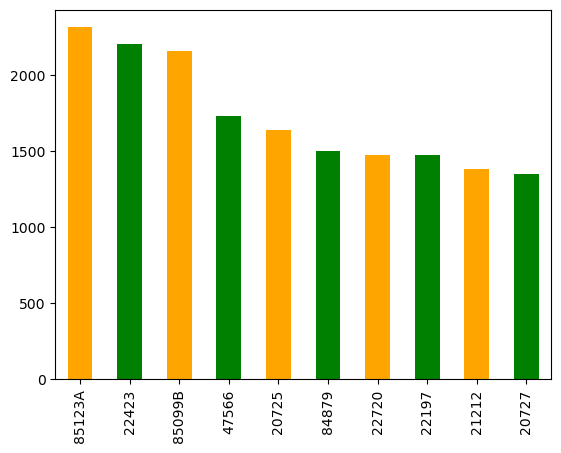

In [26]:
df['StockCode'].value_counts()[:10].plot(kind='bar',color= ['orange','g'])

In [27]:
df['StockCode'].value_counts()[:10]

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: StockCode, dtype: int64

# Year Wise Stock Data

<AxesSubplot:ylabel='year_of_date'>

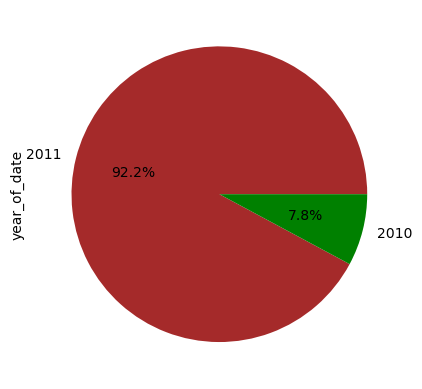

In [28]:
df['year_of_date'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['brown','g'])

In [29]:
df['year_of_date'].value_counts()

2011    499428
2010     42481
Name: year_of_date, dtype: int64

# Maximum Number Of Quantity Of Stock Returned

In [30]:
df_returned=df['Quantity'].sort_values(ascending=True)[0:10624]

<AxesSubplot:>

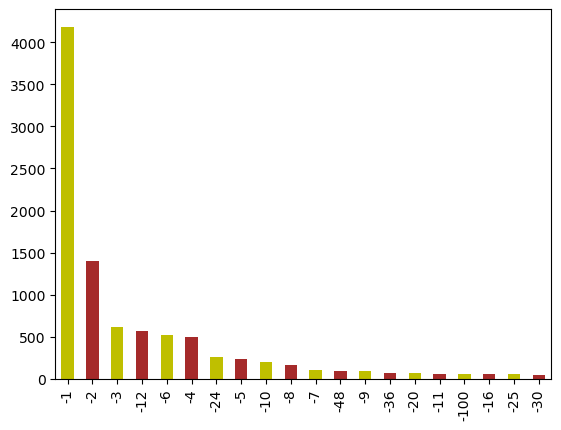

In [31]:
df_returned.value_counts()[0:20].plot(kind='bar',color=['y','brown'])

# County Wise  Quantity of stock 

In [32]:
df.groupby('Country')['Quantity'].sum()

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     142637
European Community          497
Finland                   10666
France                   110480
Germany                  117448
Greece                     1556
Hong Kong                  4769
Iceland                    2458
Israel                     4353
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16180
RSA                         352
Saudi Arabia                 75
Singapore                  5234


<AxesSubplot:xlabel='Country'>

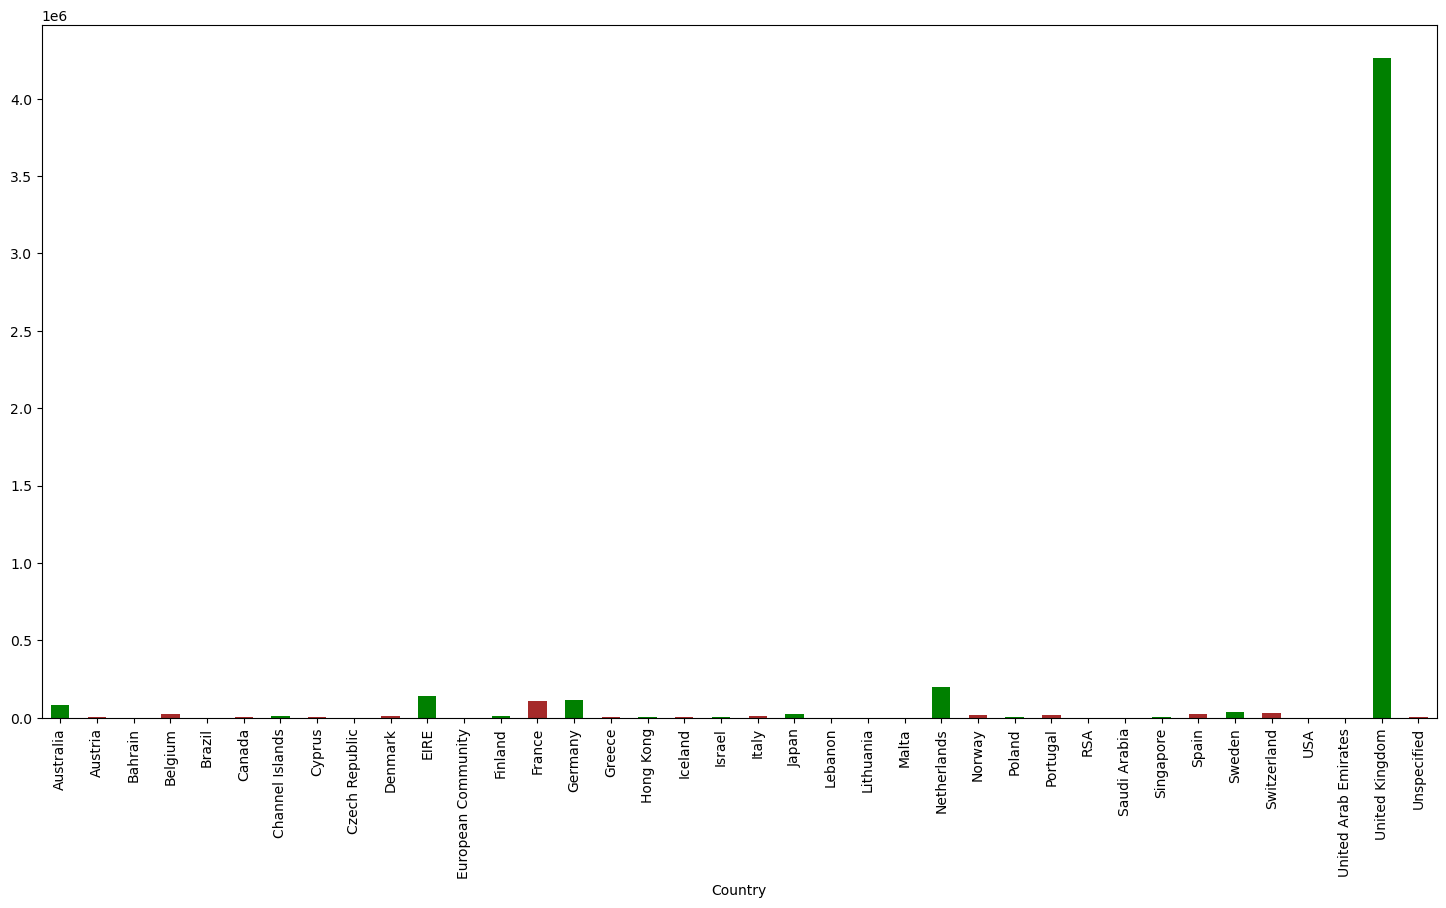

In [33]:
plt.figure(figsize=(18,9))
df.groupby('Country')['Quantity'].sum().plot(kind='bar',color=['g','brown'])

In [34]:
df.head()

,StockCode,Description,Quantity,UnitPrice,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date,Total price
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30
1,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34


# Date Wise Transaction In Stock

<AxesSubplot:>

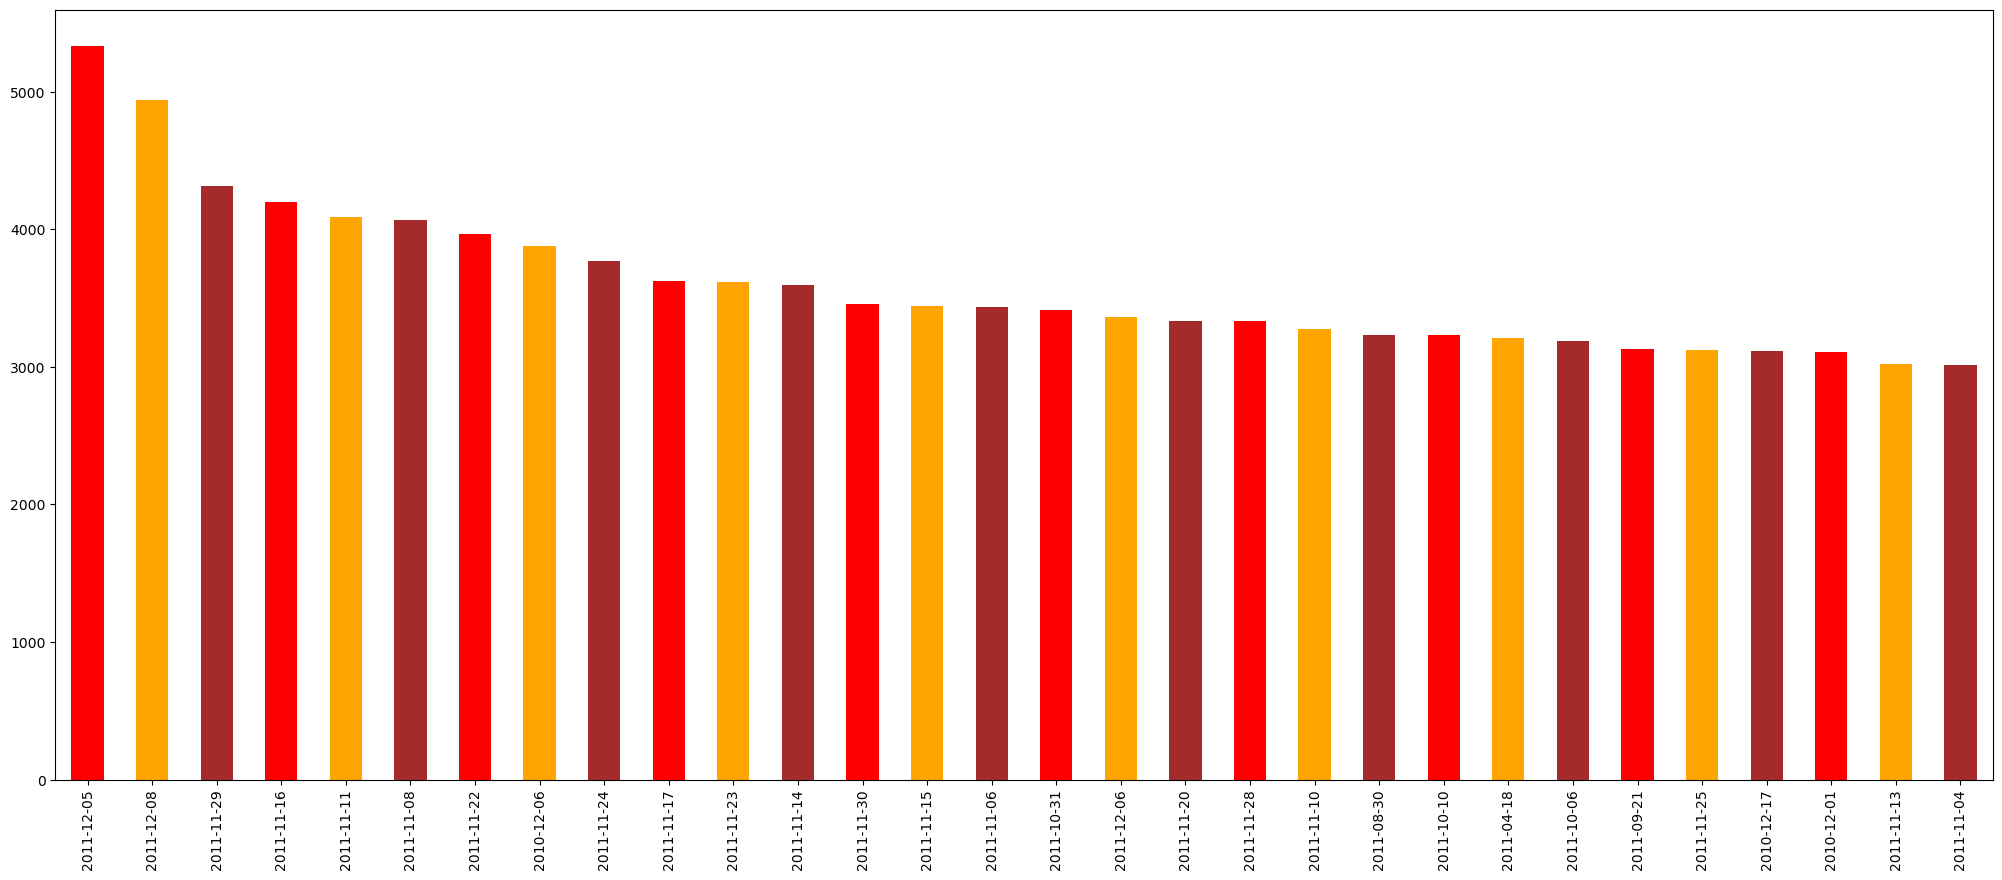

In [35]:
plt.figure(figsize=(25,10))
df['Invoice_Date'].value_counts()[0:30].plot(kind='bar',color=['r','orange','brown'])

# Time Wise Transaction In Stock

<AxesSubplot:>

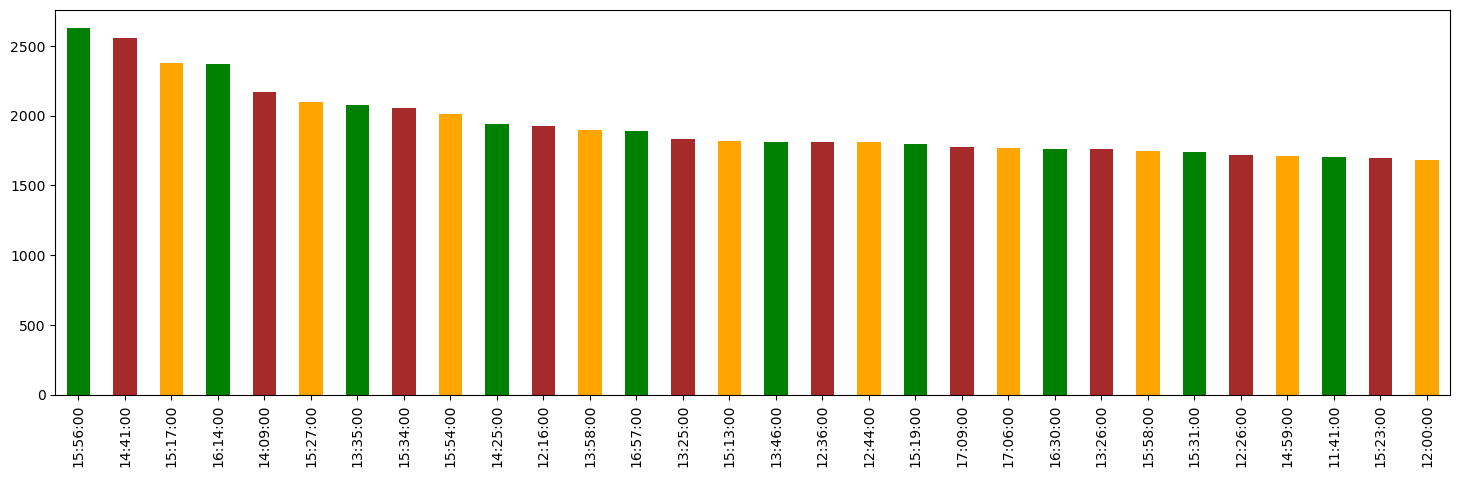

In [36]:
plt.figure(figsize=(18,5))
df['Invoice_Time'].value_counts()[0:30].plot(kind='bar',color=['g','brown','orange'])

# Most Popular Stock Description

<AxesSubplot:>

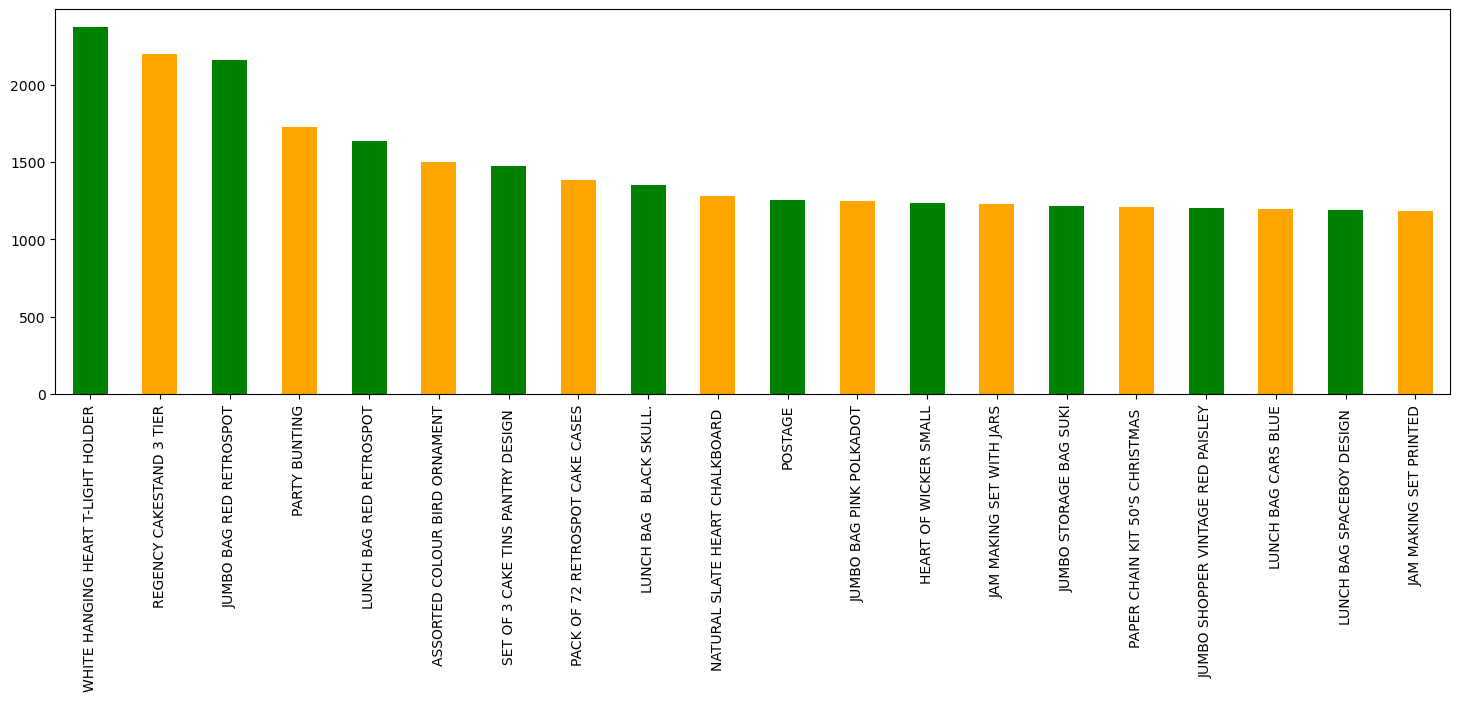

In [37]:
plt.figure(figsize=(18,5))
df['Description'].value_counts()[0:20].plot(kind='bar',color=['g','orange'])

# Date Wise Maximum No Of Transaction Country Wise

<AxesSubplot:xlabel='Country'>

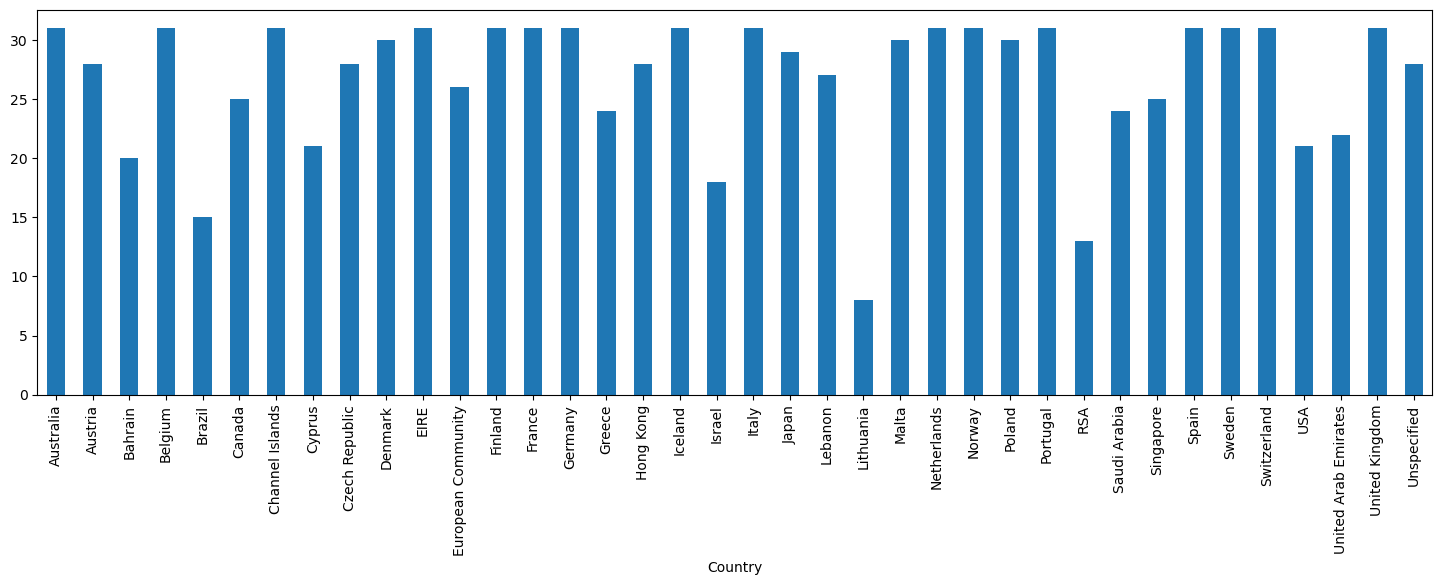

In [38]:
plt.figure(figsize=(18,5))
df.groupby('Country')['day_of_date'].max().plot(kind='bar')


In [39]:
df.head(3)

,StockCode,Description,Quantity,UnitPrice,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date,Total price
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30
1,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00


# Average  Per Unit Price Country Wise

<AxesSubplot:xlabel='Country'>

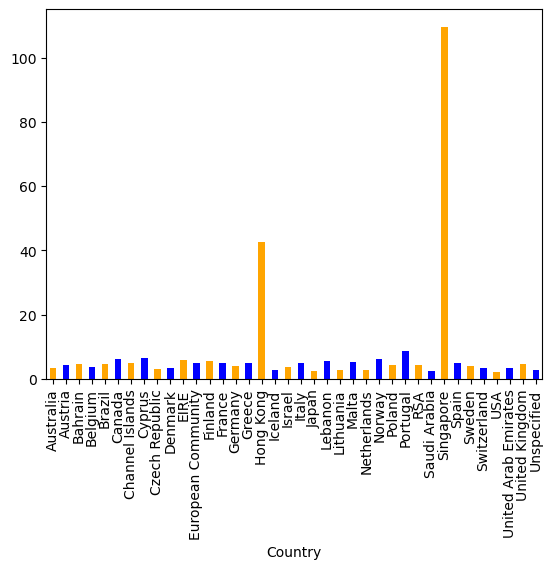

In [40]:
df.groupby('Country')['UnitPrice'].mean().plot(kind='bar',color=['orange','b'])

# Visualize the distribution of each feature in the dataset using a histogram.

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'year_of_date'}>,
        <AxesSubplot:title={'center':'month_of_date'}>],
       [<AxesSubplot:title={'center':'day_of_date'}>,
        <AxesSubplot:title={'center':'Total price'}>]], dtype=object)

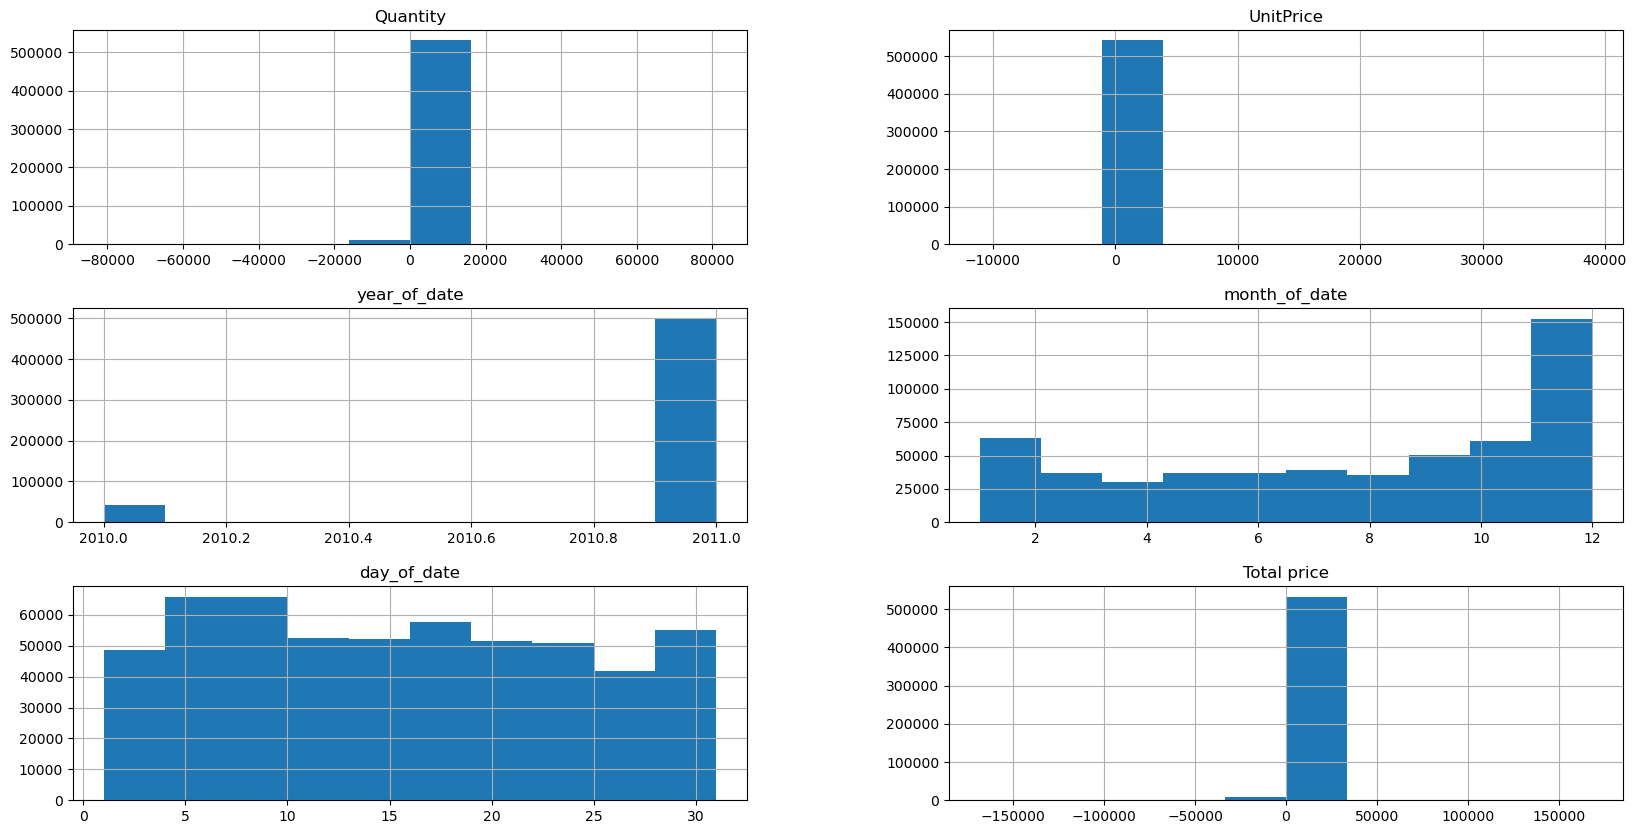

In [41]:
#write observation and code here
df.hist(figsize=(20,10))

# Visualize the correlation matrix between the features in the dataset using a heatmap

In [42]:
#write observation and code here
df.corr()


,Quantity,UnitPrice,year_of_date,month_of_date,day_of_date,Total price
Quantity,1.000000,-0.001235,0.002001,-0.001116,-0.000010,0.886681
UnitPrice,-0.001235,1.000000,-0.004586,-0.000497,-0.002667,-0.162029
year_of_date,0.002001,-0.004586,1.000000,-0.369595,0.163774,0.000275
month_of_date,-0.001116,-0.000497,-0.369595,1.000000,-0.118878,0.000141
day_of_date,-0.000010,-0.002667,0.163774,-0.118878,1.000000,-0.000259
Total price,0.886681,-0.162029,0.000275,0.000141,-0.000259,1.000000


<AxesSubplot:>

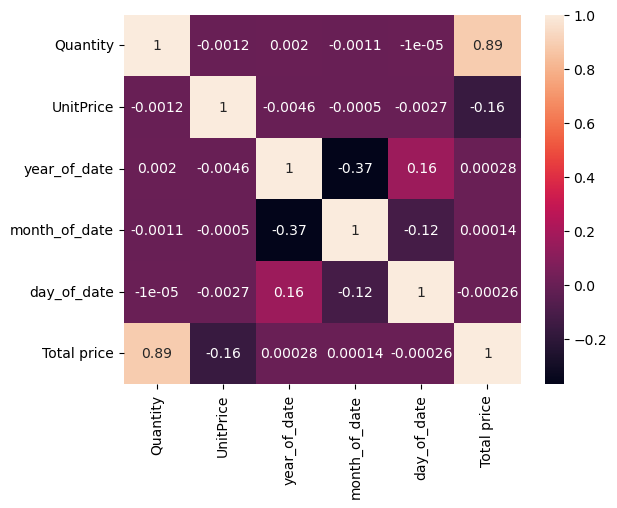

In [43]:
sns.heatmap(df.corr(),annot=True)

# Drop the unwanted columns fro the dataframe

In [44]:
#write observation and code here
df.sample()

,StockCode,Description,Quantity,UnitPrice,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date,Total price
143805,22489,PACK OF 12 TRADITIONAL CRAYONS,10,0.42,United Kingdom,2011-04-03,14:42:00,2011,4,3,4.2


In [45]:
df.drop(['Description','Invoice_Time','Invoice_Date','Total price','StockCode'],axis=1,inplace=True)

In [46]:
df.sample()

,Quantity,UnitPrice,Country,year_of_date,month_of_date,day_of_date
469358,3,0.39,United Kingdom,2011,11,15


# Convert Categories Into Numerical 

In [47]:
df1=pd.get_dummies(df)

In [48]:
df1.sample()

,Quantity,UnitPrice,year_of_date,month_of_date,day_of_date,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
270012,8,2.55,2011,7,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Scaling And Transformation

In [49]:
from sklearn.preprocessing import RobustScaler

In [50]:
RS=RobustScaler()

In [51]:
df[['Quantity','UnitPrice','year_of_date','month_of_date','day_of_date']]=RS.fit_transform(df[['Quantity','UnitPrice','year_of_date','month_of_date','day_of_date']])

In [52]:
df1.sample()

,Quantity,UnitPrice,year_of_date,month_of_date,day_of_date,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
459338,1,12.46,2011,11,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
from sklearn.preprocessing import PowerTransformer

In [54]:
PT=PowerTransformer()

In [55]:
df[['Quantity','UnitPrice','year_of_date','month_of_date','day_of_date']]=PT.fit_transform(df[['Quantity','UnitPrice','year_of_date','month_of_date','day_of_date']])

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'year_of_date'}>,
        <AxesSubplot:title={'center':'month_of_date'}>],
       [<AxesSubplot:title={'center':'day_of_date'}>, <AxesSubplot:>]],
      dtype=object)

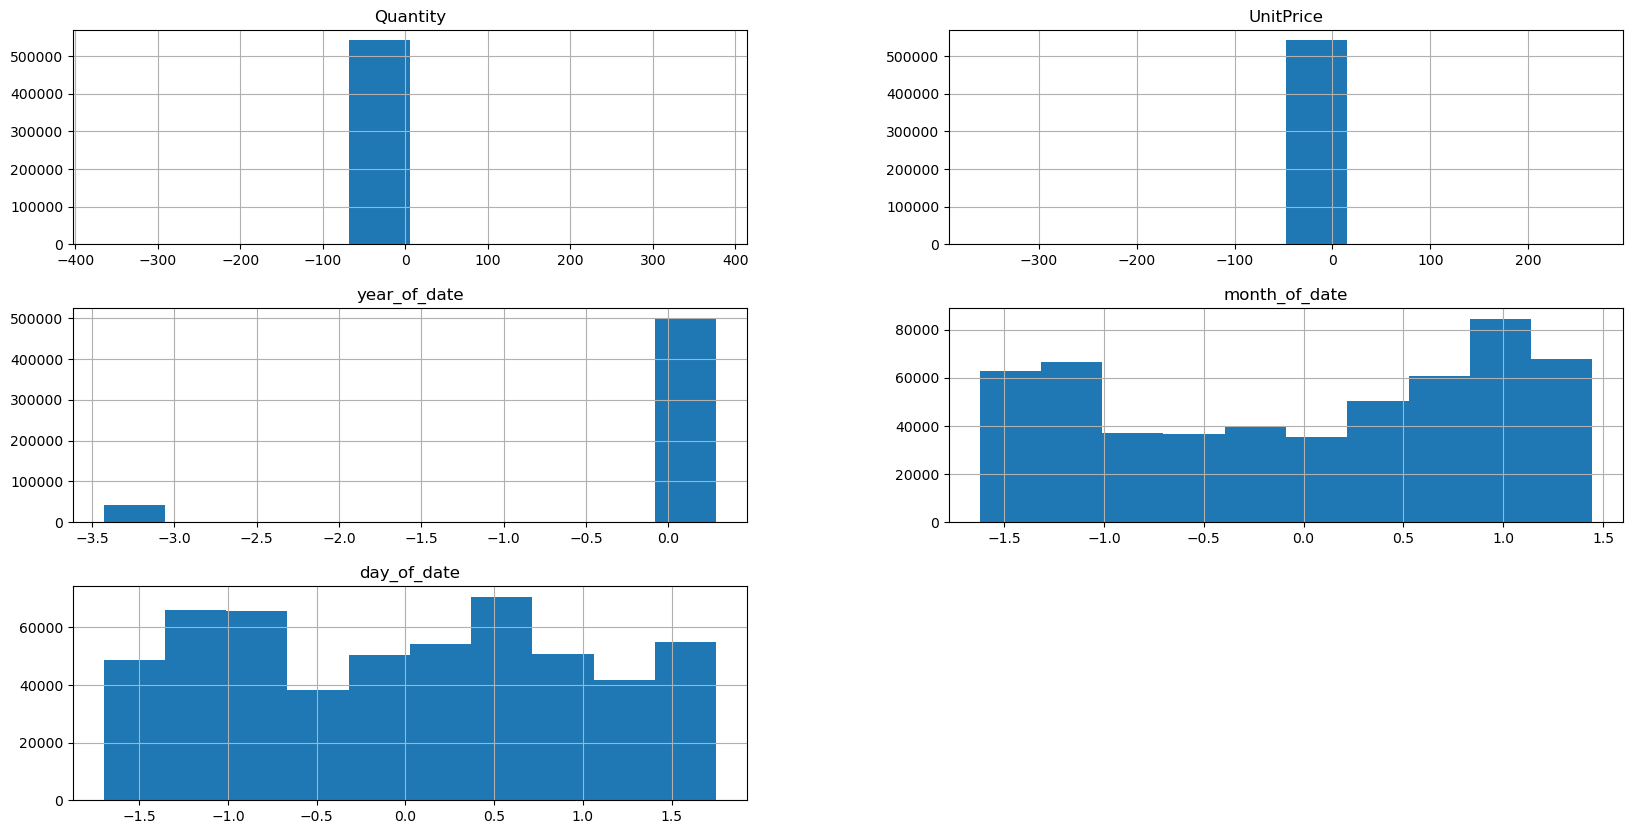

In [56]:
df.hist(figsize=(20,10))

# Predict the groups

In [57]:
df1=df.sample(10000)

In [58]:
#write observation and code here
x=df1.iloc[:,3:].values

In [59]:
x

array([[ 0.29164929, -1.62230297,  0.49701358],
       [-3.42877572,  1.44646812, -0.79939992],
       [ 0.29164929,  1.02946345,  0.27391577],
       ...,
       [ 0.29164929,  1.44646812, -1.05194445],
       [ 0.29164929, -0.31914755,  0.49701358],
       [-3.42877572,  1.44646812, -0.67484519]])

# K-Means Clustering

In [60]:
from sklearn.cluster import KMeans

In [61]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [62]:
label=kmeans.fit_predict(x)

In [63]:
label

array([4, 2, 1, ..., 3, 4, 2], dtype=int32)

# calculate the shilhouette score

In [64]:
#write observation and code here
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(x,label)

0.4664522312487027

### <span style='color:Blue'> **Question - 10.Change the parameter value to increase the shilhouette score value** </span>

In [66]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [67]:
print(wcss)

[29289.046062842302, 17897.194229136316, 10624.042491757184, 6853.192401775135, 4369.276482235477, 3694.252494267058, 3177.0895805746786, 2775.527415699473, 2443.3806536320444, 2230.5612111358514]


/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WCSS')

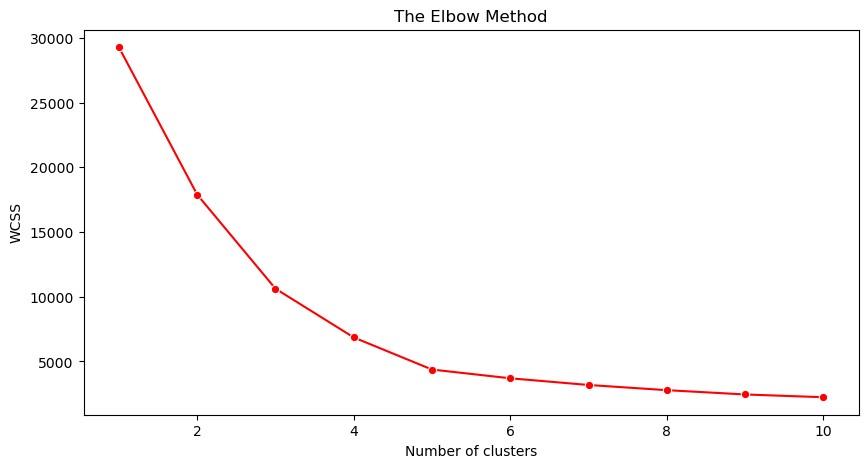

In [68]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker='o', color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [69]:
kmeans1=KMeans(n_clusters=6,init='k-means++',random_state=42)

In [70]:
label2=kmeans1.fit_predict(x)

In [71]:
label2

array([4, 3, 5, ..., 1, 4, 3], dtype=int32)

In [72]:
silhouette_score(x,label2)

0.44162898803700484

In [73]:
from scipy.cluster import hierarchy

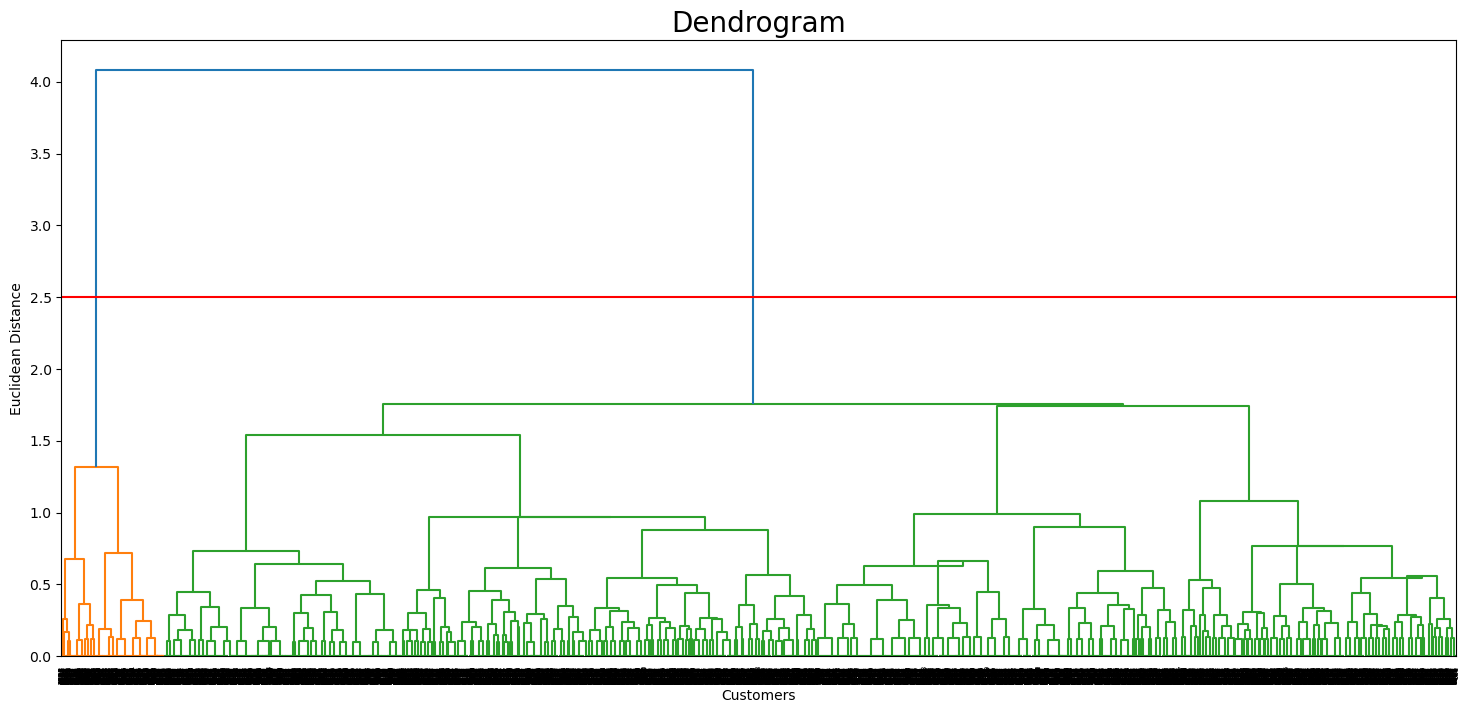

In [74]:
plt.figure(figsize=(18,8))

dendrogram=hierarchy.dendrogram(hierarchy.linkage(x,'centroid'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(2.5,color='red')
plt.show()

In [75]:
from sklearn.cluster import AgglomerativeClustering

In [76]:
clustering_model=AgglomerativeClustering(n_clusters=6,affinity='euclidean')

In [77]:
clustering_model.fit(x)

AgglomerativeClustering(n_clusters=6)

In [78]:
clustering_prediction=clustering_model.fit_predict(x)

In [79]:
clustering_prediction

array([1, 3, 0, ..., 0, 2, 3])

In [80]:
silhouette_score(x,clustering_prediction)

0.3891289751358623